# 결정트리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.5 결정트리(decision tree)

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [18]:
from preamble import *

## 결정 트리를 활용한 분류

### mglearn 라이브러리의 plots 모듈의 `plot_animal_tree` 함수를 실행하세요.
- Graphviz를 설치(https://graphviz.org/download/)해야 합니다.
- graphviz 파이썬 패키지도 설치해야 합니다.

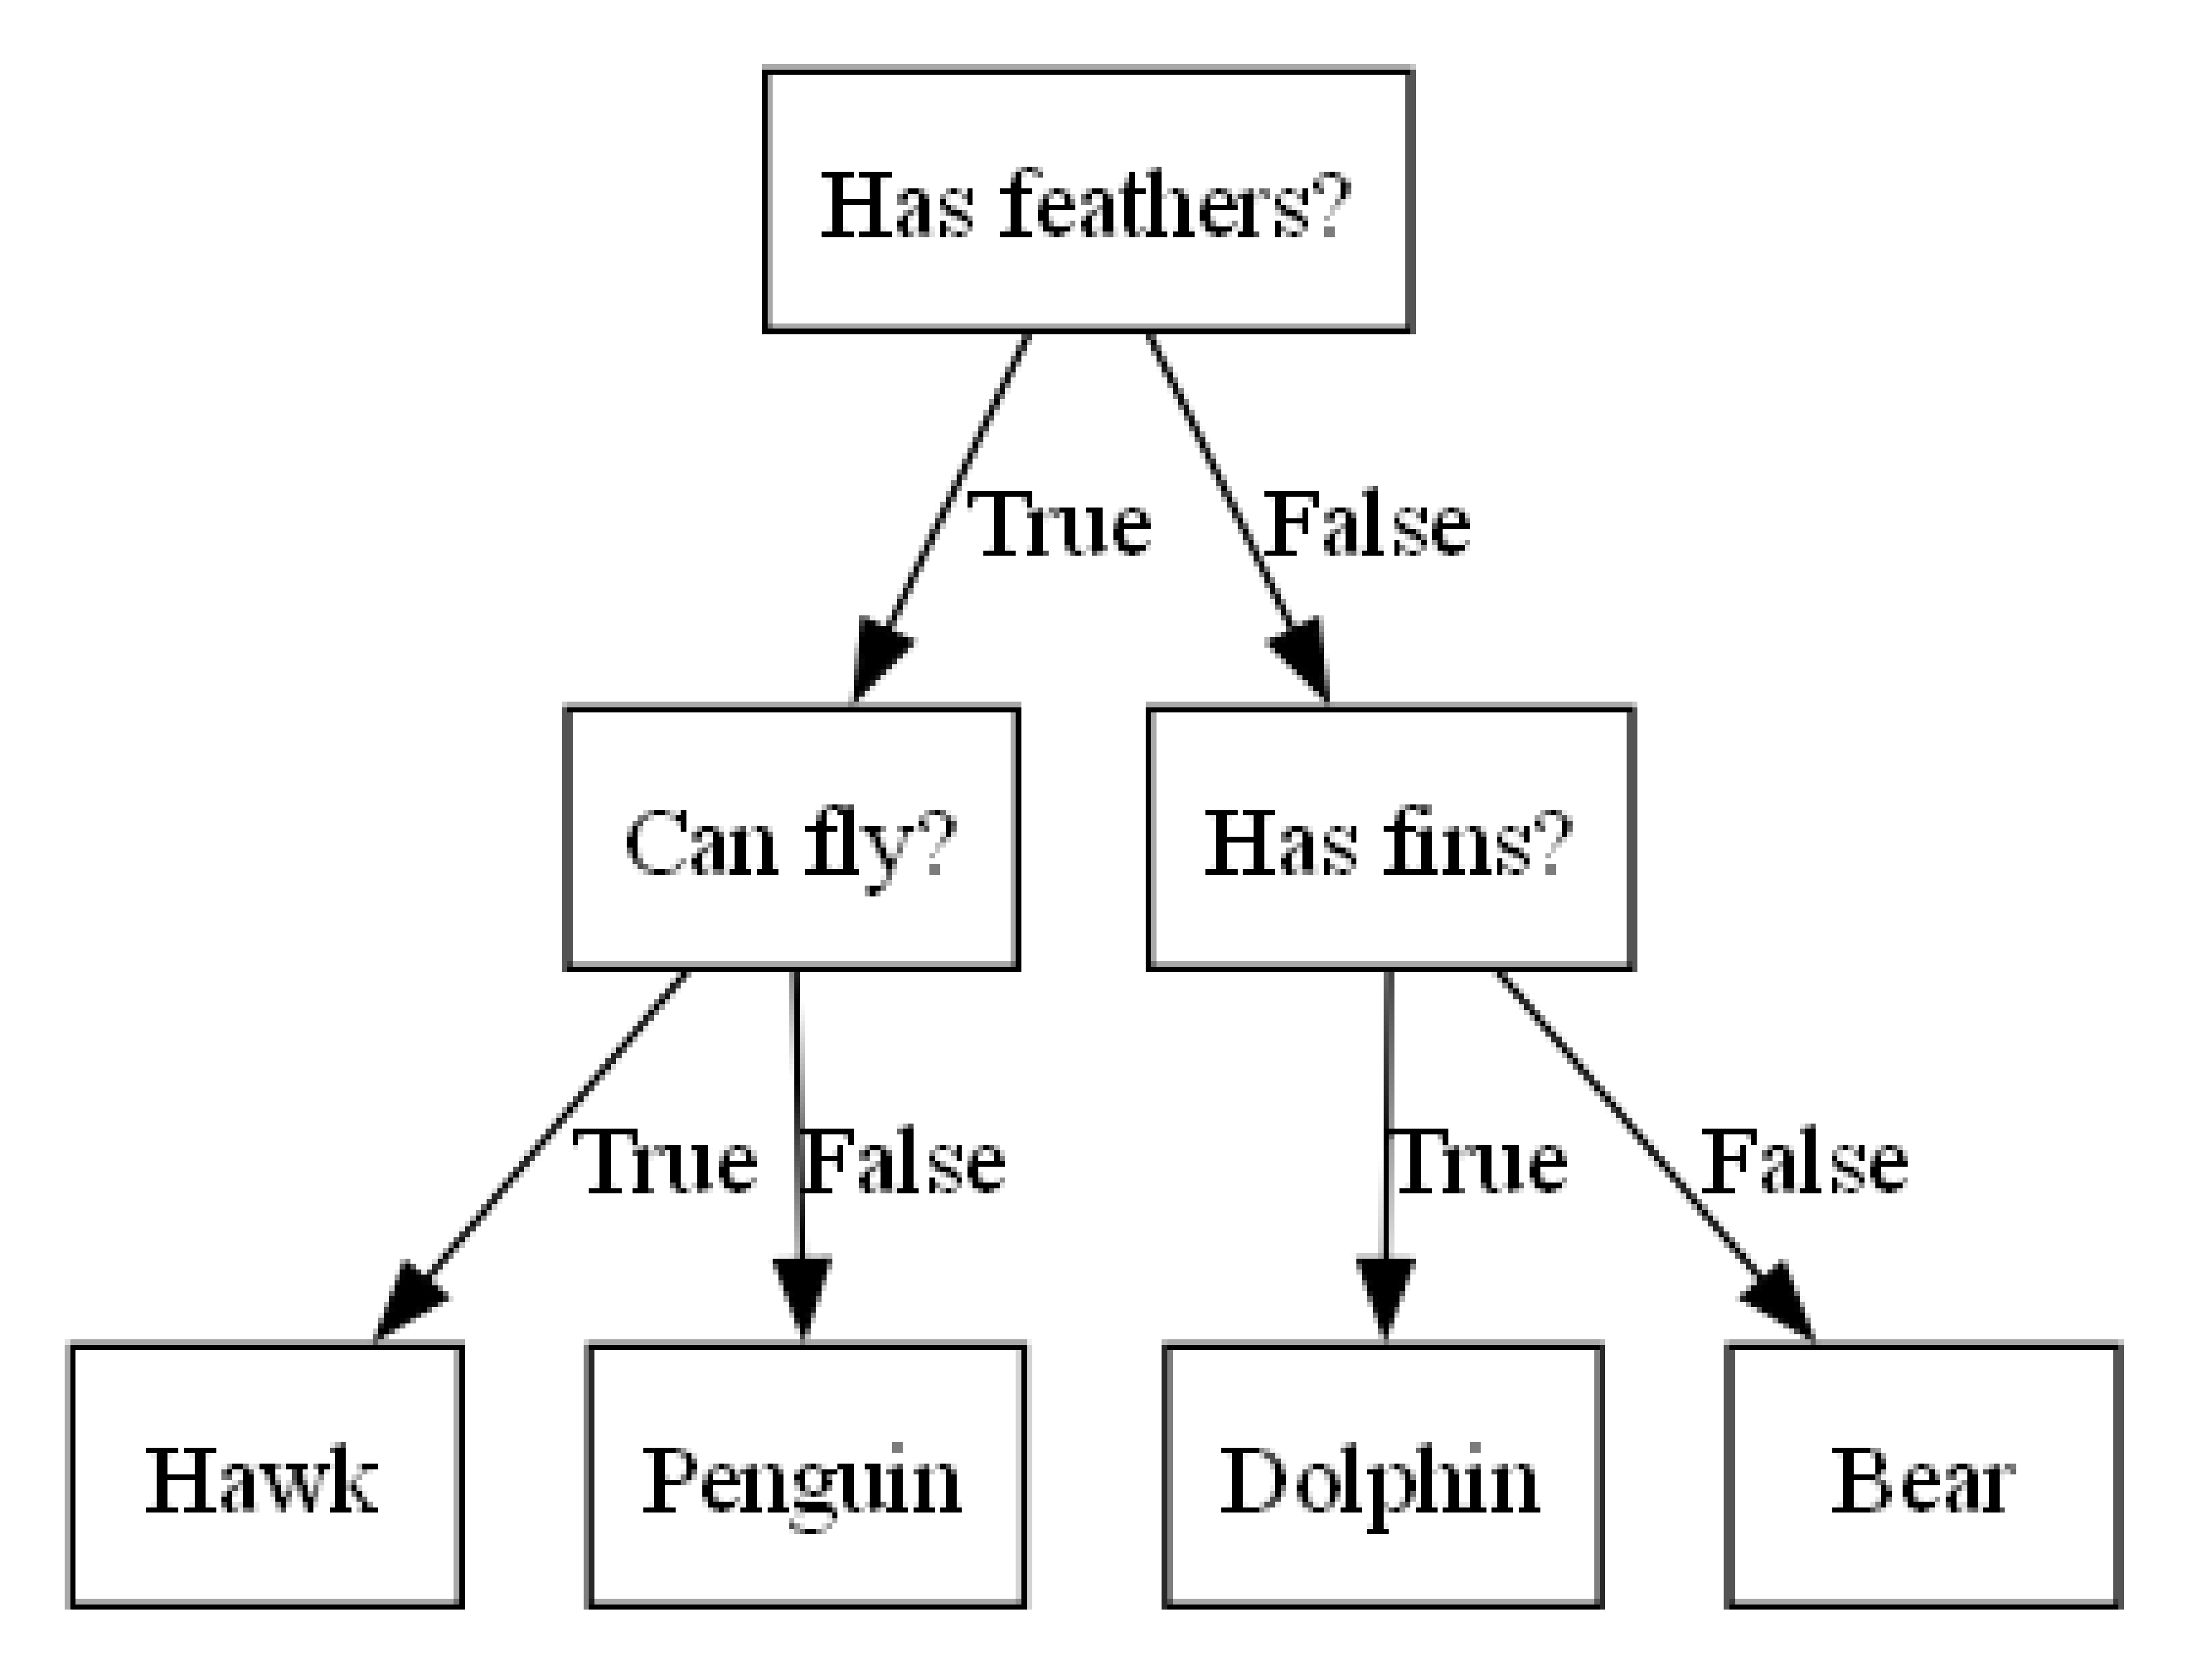

In [3]:
mglearn.plots.plot_animal_tree()

### mglearn 라이브러리의 plots 모듈의 `plot_tree_progressive` 함수를 실행하세요.

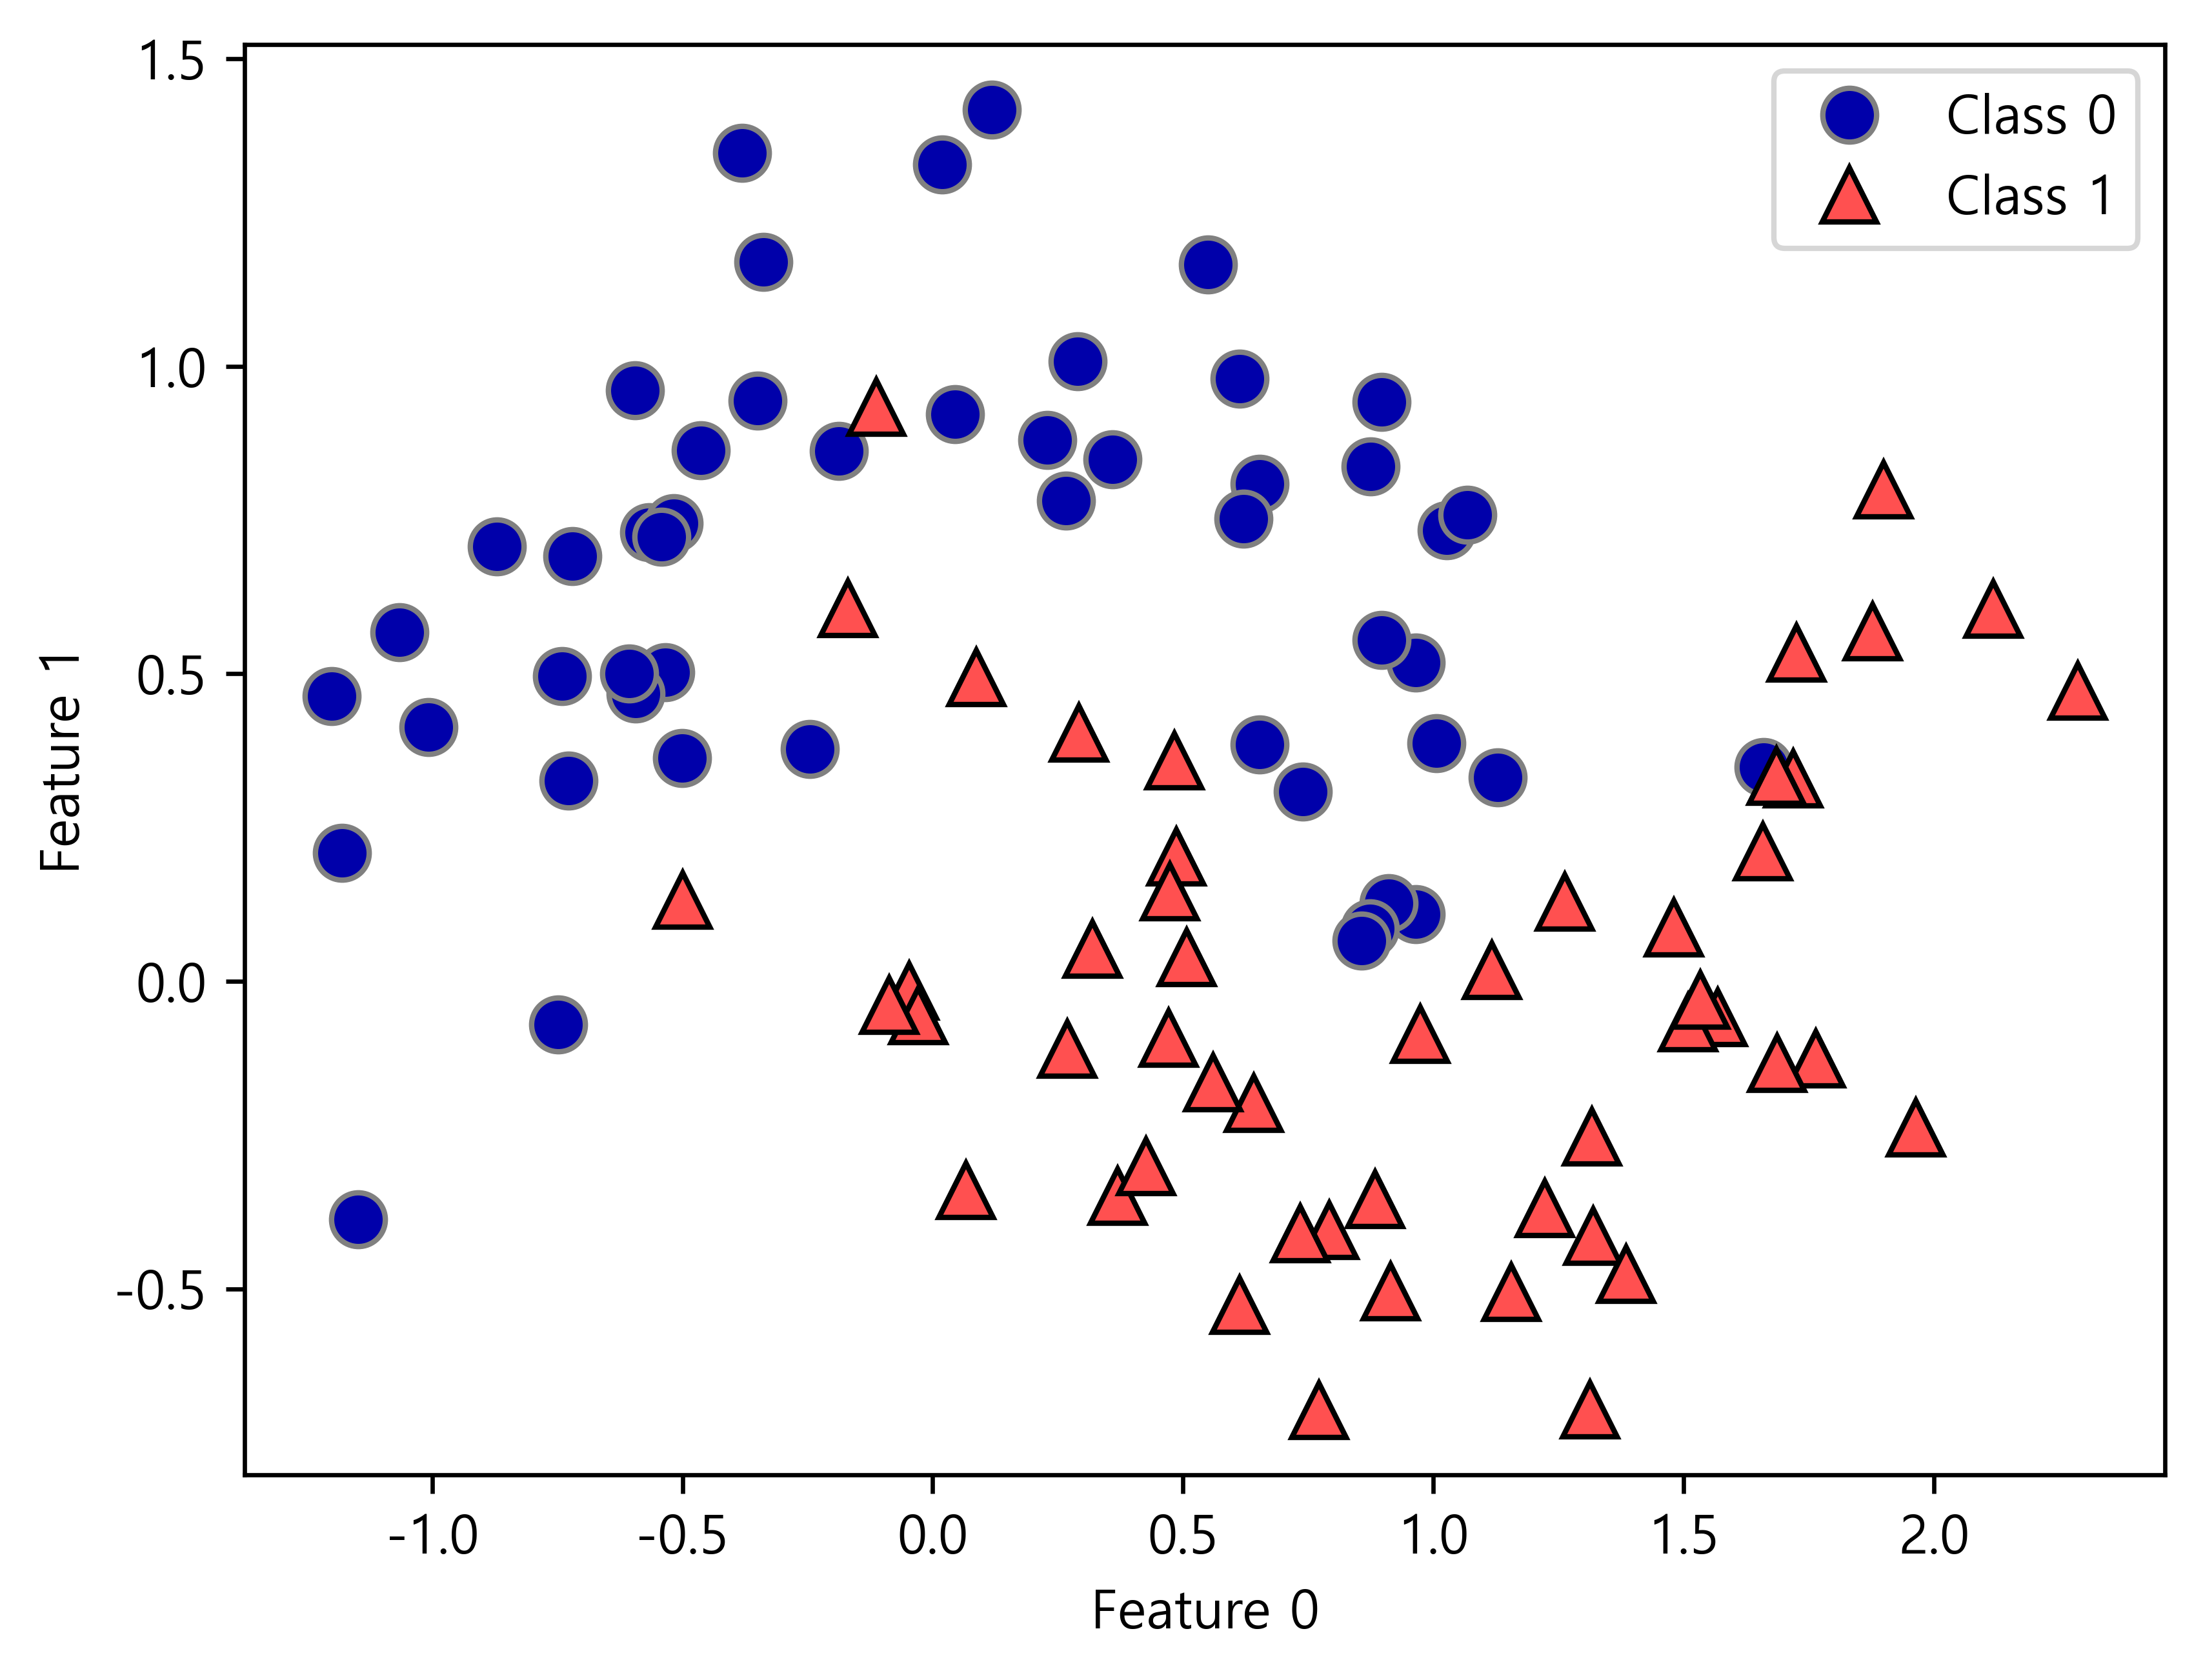

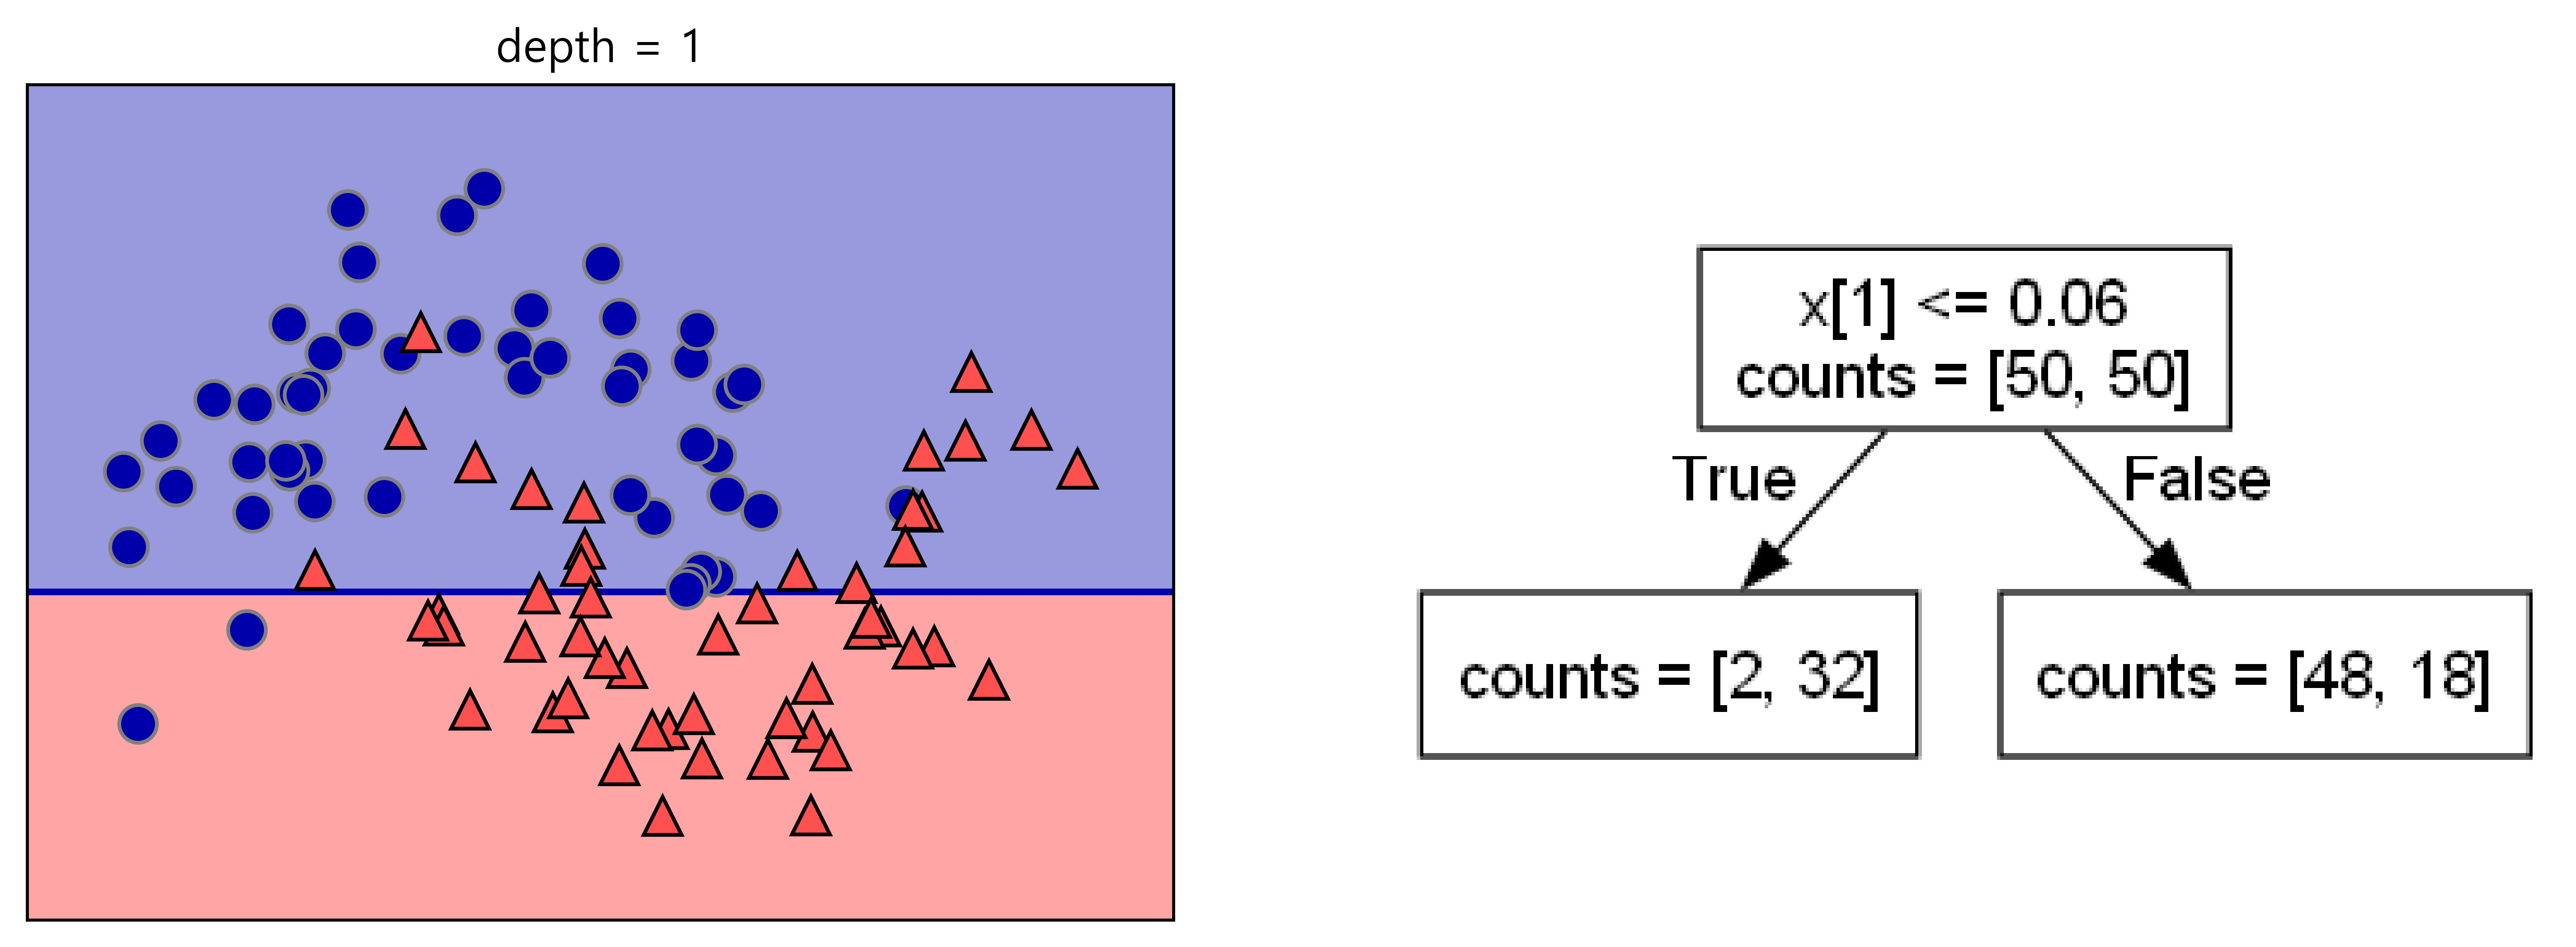

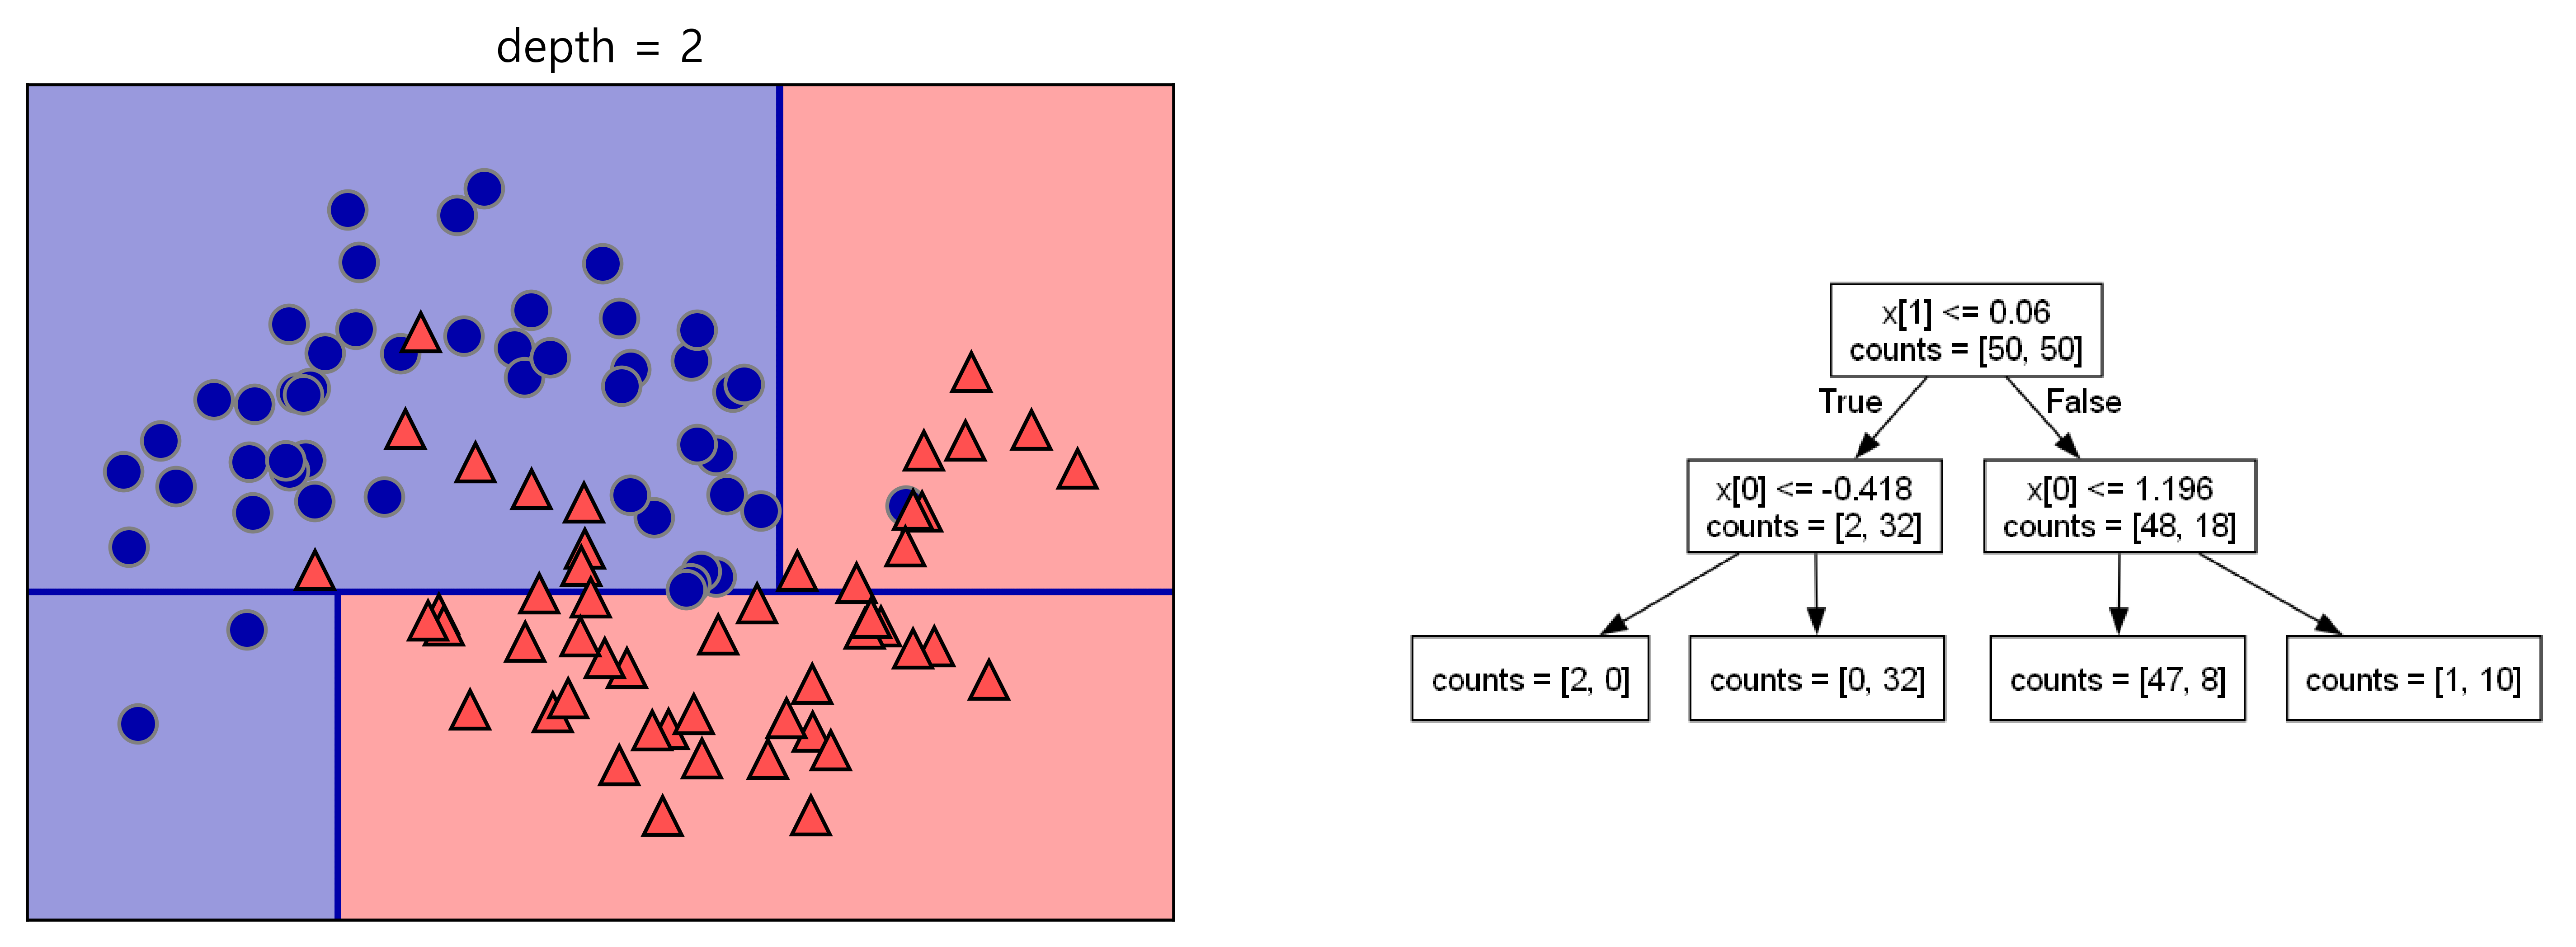

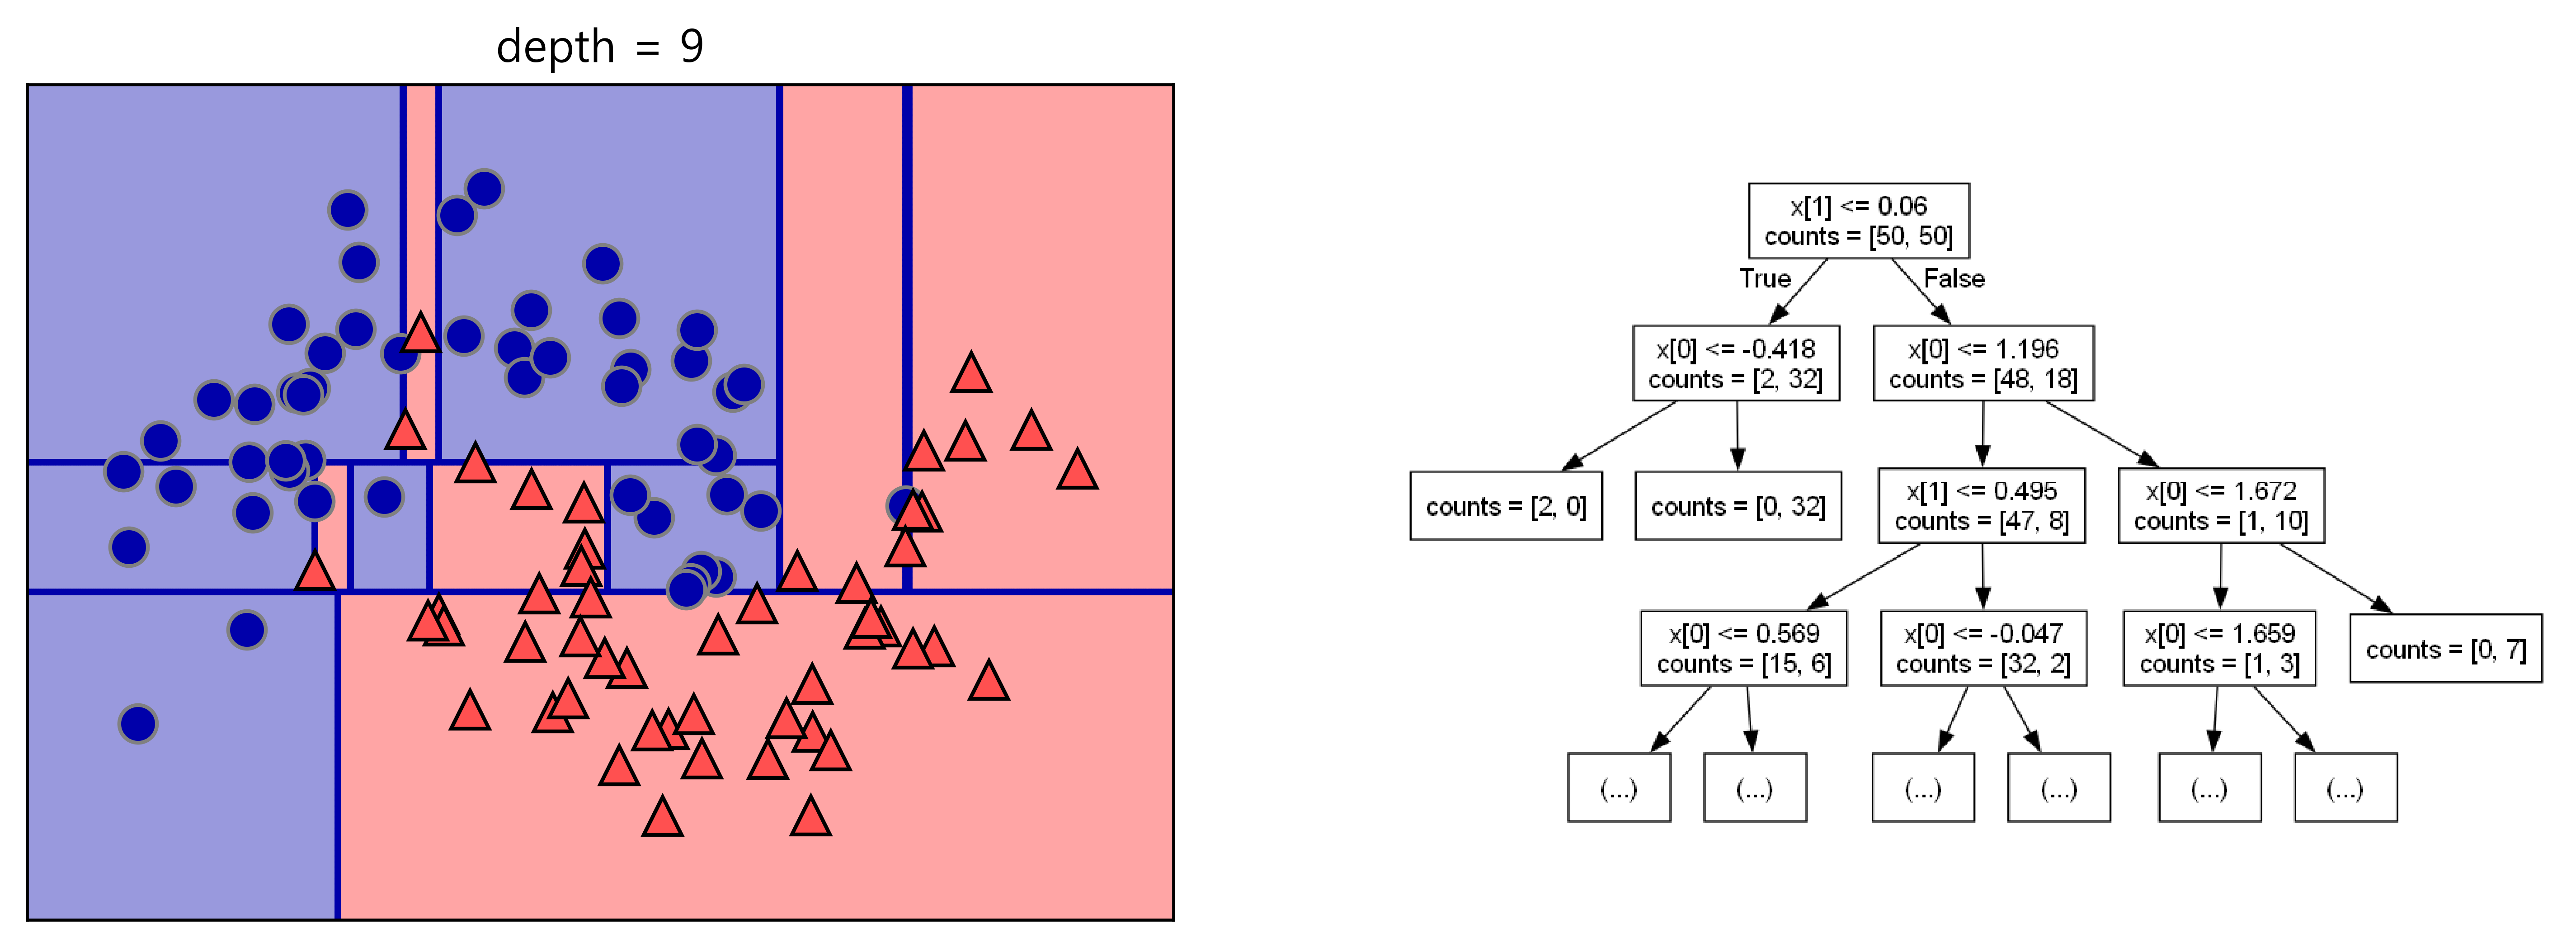

In [4]:
mglearn.plots.plot_tree_progressive()

### DT-Q1. DecisionTreeClassifier를 사용해서 분류 문제를 해결하세요.

> 아래 문제는 하나의 셀에 작성하세요. 여러 셀에 걸쳐서 작성하게 코드가 부분적으로 떨어져 있어서 가독성이 좋지 않습니다.

- [ ] DT-Q1(a). 유방암 데이터를 불러오세요.
- [ ] DT-Q1(b). 학습(train) 데이터와 테스트(test) 데이터로 분류하세요. 단, 분류 문제의 특성을 고려하세요.
- [ ] DT-Q1(c). 결정 트리 학습기 객체를 생성하세요.
- [ ] DT-Q1(d). 결정 트리 학습기를 사용해서 학습을 진행하세요.
- [ ] DT-Q1(e). 훈련 정확도와 테스트 정확도를 소숫점 3자리까지 표시하세요.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
#train_test_split(cancer.data, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42
                                                    )
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(f"훈련 정확도:{dt.score(X_train, y_train)}")
print(f"테스트 정확도 :{dt.score(X_test, y_test)}")

훈련 정확도:1.0
테스트 정확도 :0.9230769230769231


### DT-Q2. DecisionTreeClassifier를 사용해서 분류 문제를 개선하세요.

> 아래 문제는 하나의 셀에 작성하세요. 여러 셀에 걸쳐서 작성하게 코드가 부분적으로 떨어져 있어서 가독성이 좋지 않습니다.

- [ ] DT-Q2(a). 결정 트리 학습기 객체를 생성할 때, 트리의 최대 높이를 `4`로 제한하세요.
- [ ] DT-Q2(b). 결정 트리 학습기를 사용해서 학습을 진행하세요.
- [ ] DT-Q2(c). 훈련 정확도와 테스트 정확도를 소숫점 3자리까지 표시하세요.

In [6]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
print(f"훈련 정확도:{dt.score(X_train, y_train)}")
print(f"테스트 정확도 :{dt.score(X_test, y_test)}")

훈련 정확도:0.9882629107981221
테스트 정확도 :0.9440559440559441


### DT-Q3. Graphviz를 활용한 DecisionTreeClassifier를 시각적으로 표현하세요.
- [ ] DT-Q3(a). 결정 트리 학습기 객체를 생성할 때, 트리의 최대 높이를 `4`로 제한하세요.
    - 수업에선 교재에 있는 내용을 설명하지만, 학습을 위해서 가능하면 공식 홈페이지(https://scikit-learn.org/dev/modules/generated/sklearn.tree.export_graphviz.html) 참고하세요.
        - out_file
        - class_names
        - feature_names
        - impurity
        - filled
    - 결정트리 시각화는 결과 분석을 위해서 중요하니 꼭 알아두세요.

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="dt.dot", class_names=["F", "T"], feature_names=cancer.feature_names)

- [ ] DT-Q3(b). matplotlib를 사용해서 `dot` 파일을 출력하세요.

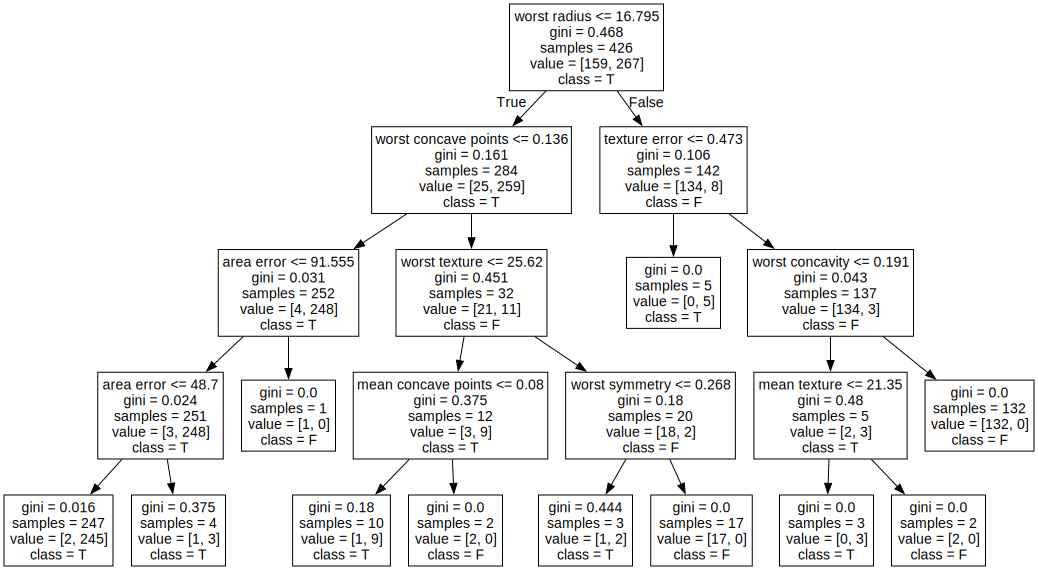

In [8]:
import graphviz 
with open("dt.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

- [ ] DT-Q3(c). scikit-learn에서 제공하는 `plot_tree` 함수를 활용하세요.

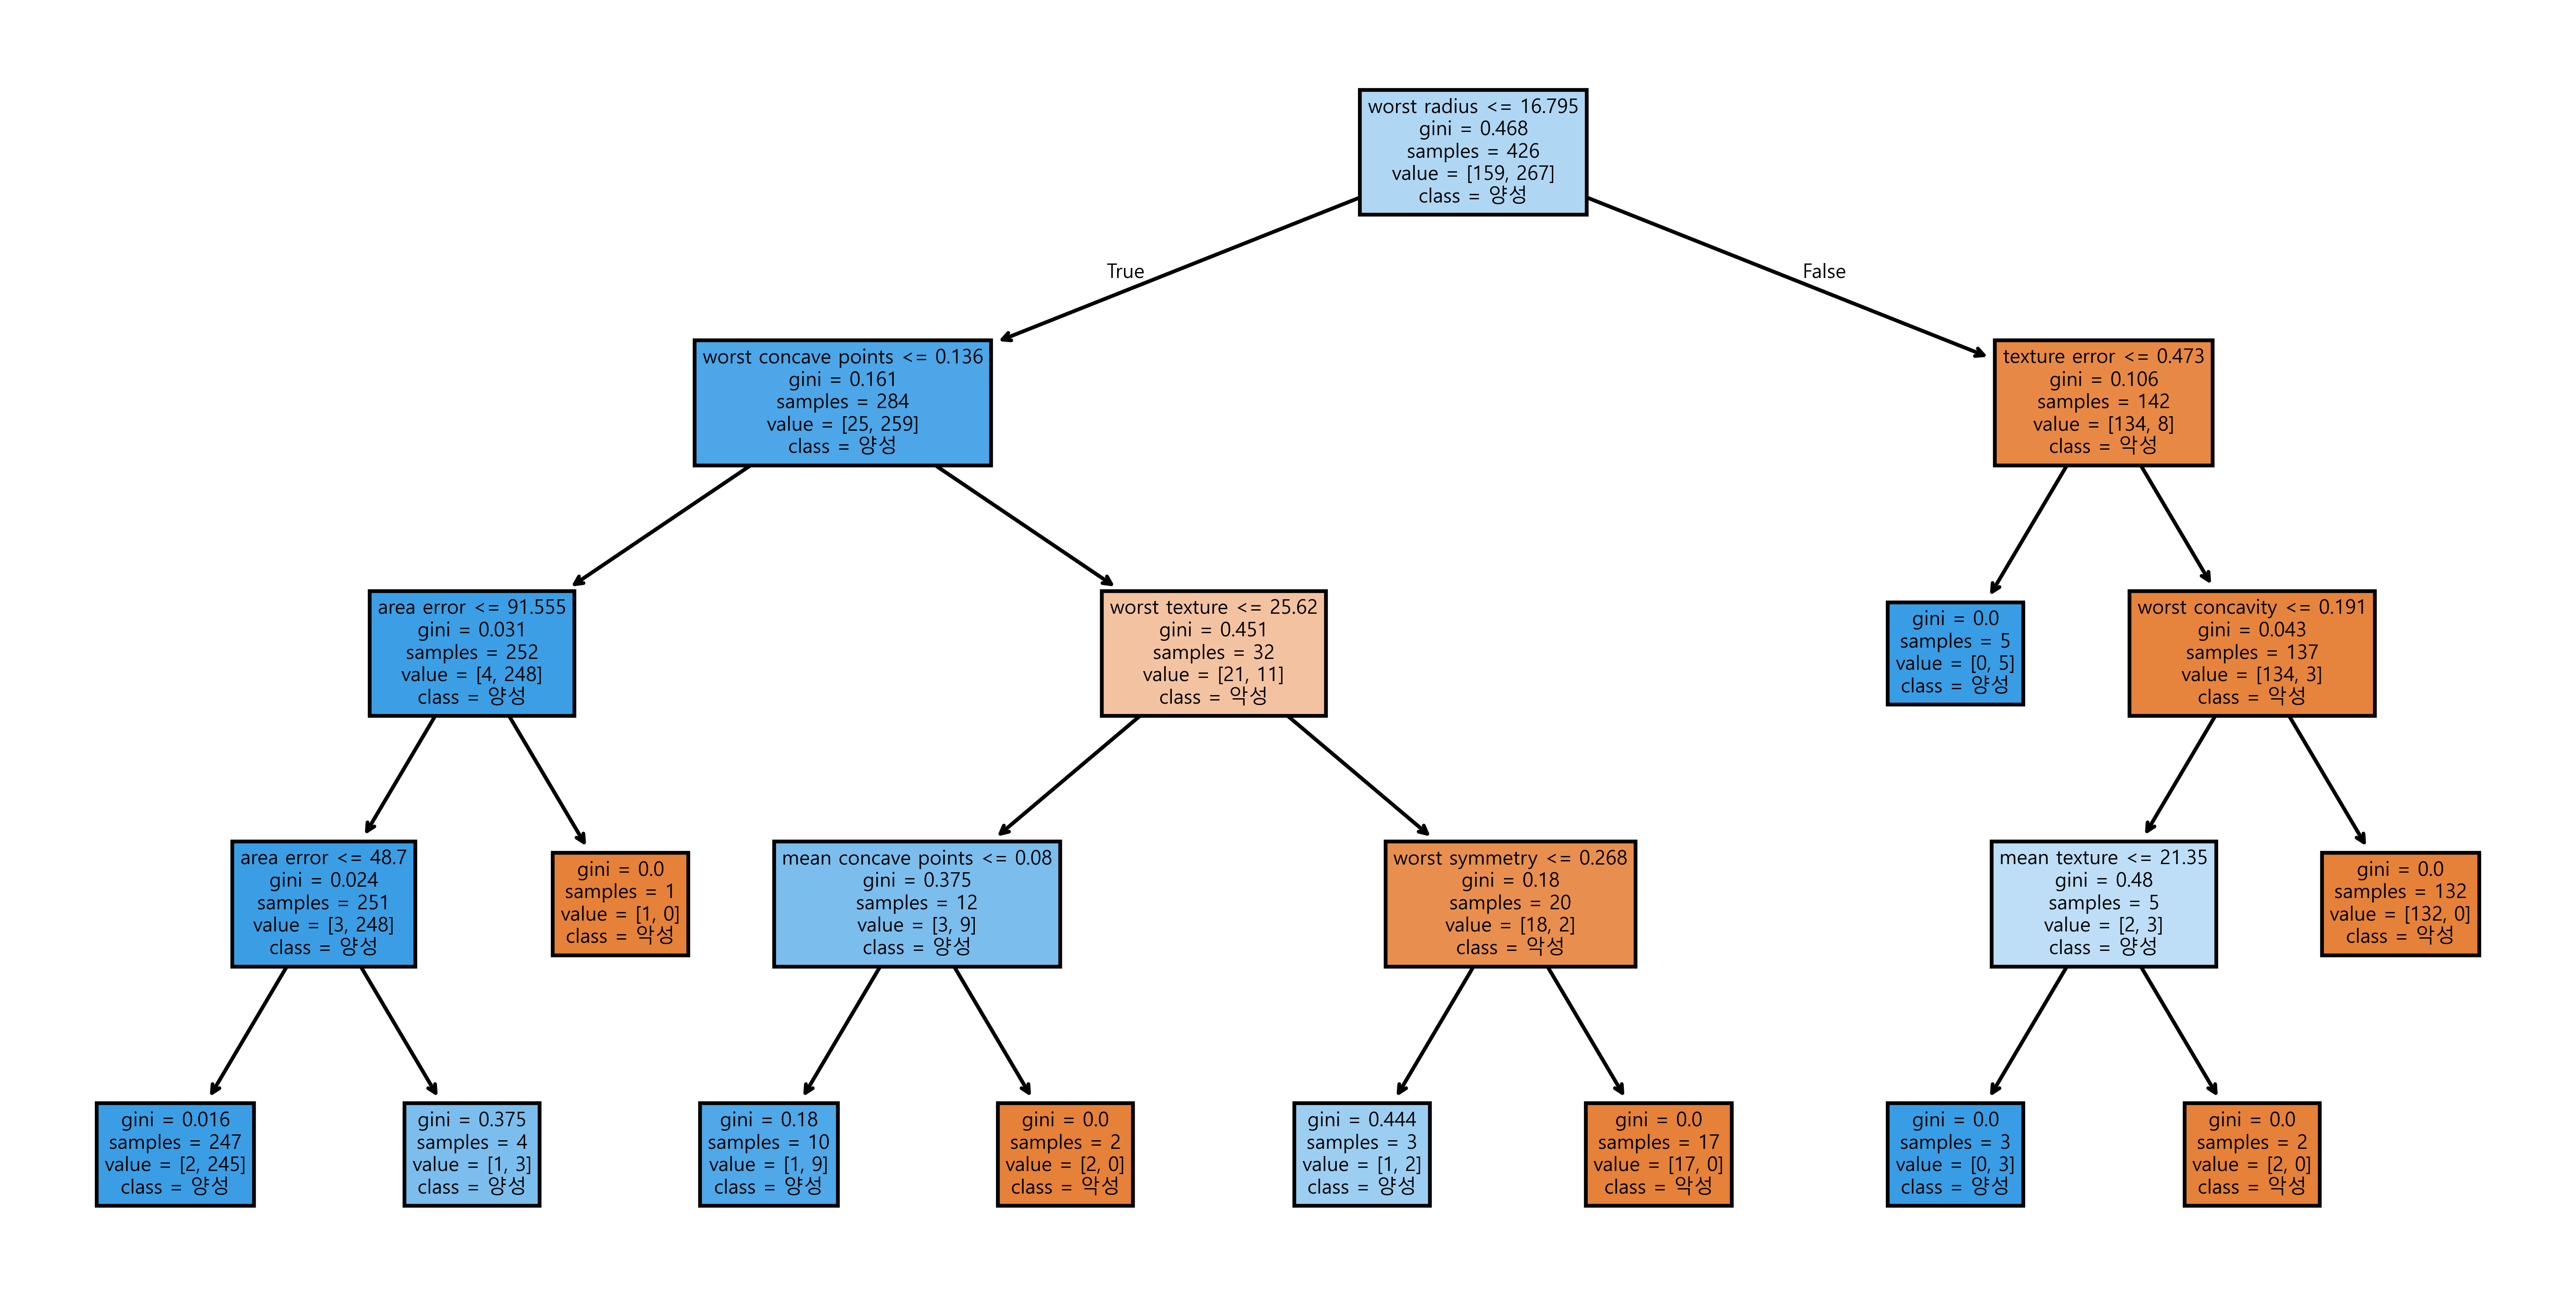

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(dt, 
          class_names=["악성", "양성"],
          feature_names=cancer.feature_names,
          filled=True)
plt.show()

### DT-Q4. 트리의 특성 중요도를 출력하고, 시각적으로 표현하세요.
- [ ] DT-Q4(a). 트리의 특성 중요도를 출력하세요.

In [10]:
dt.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

- [ ] DT-Q4(b). 특성 중요도를 그래프로 생성하세요.

In [14]:
import numpy as np

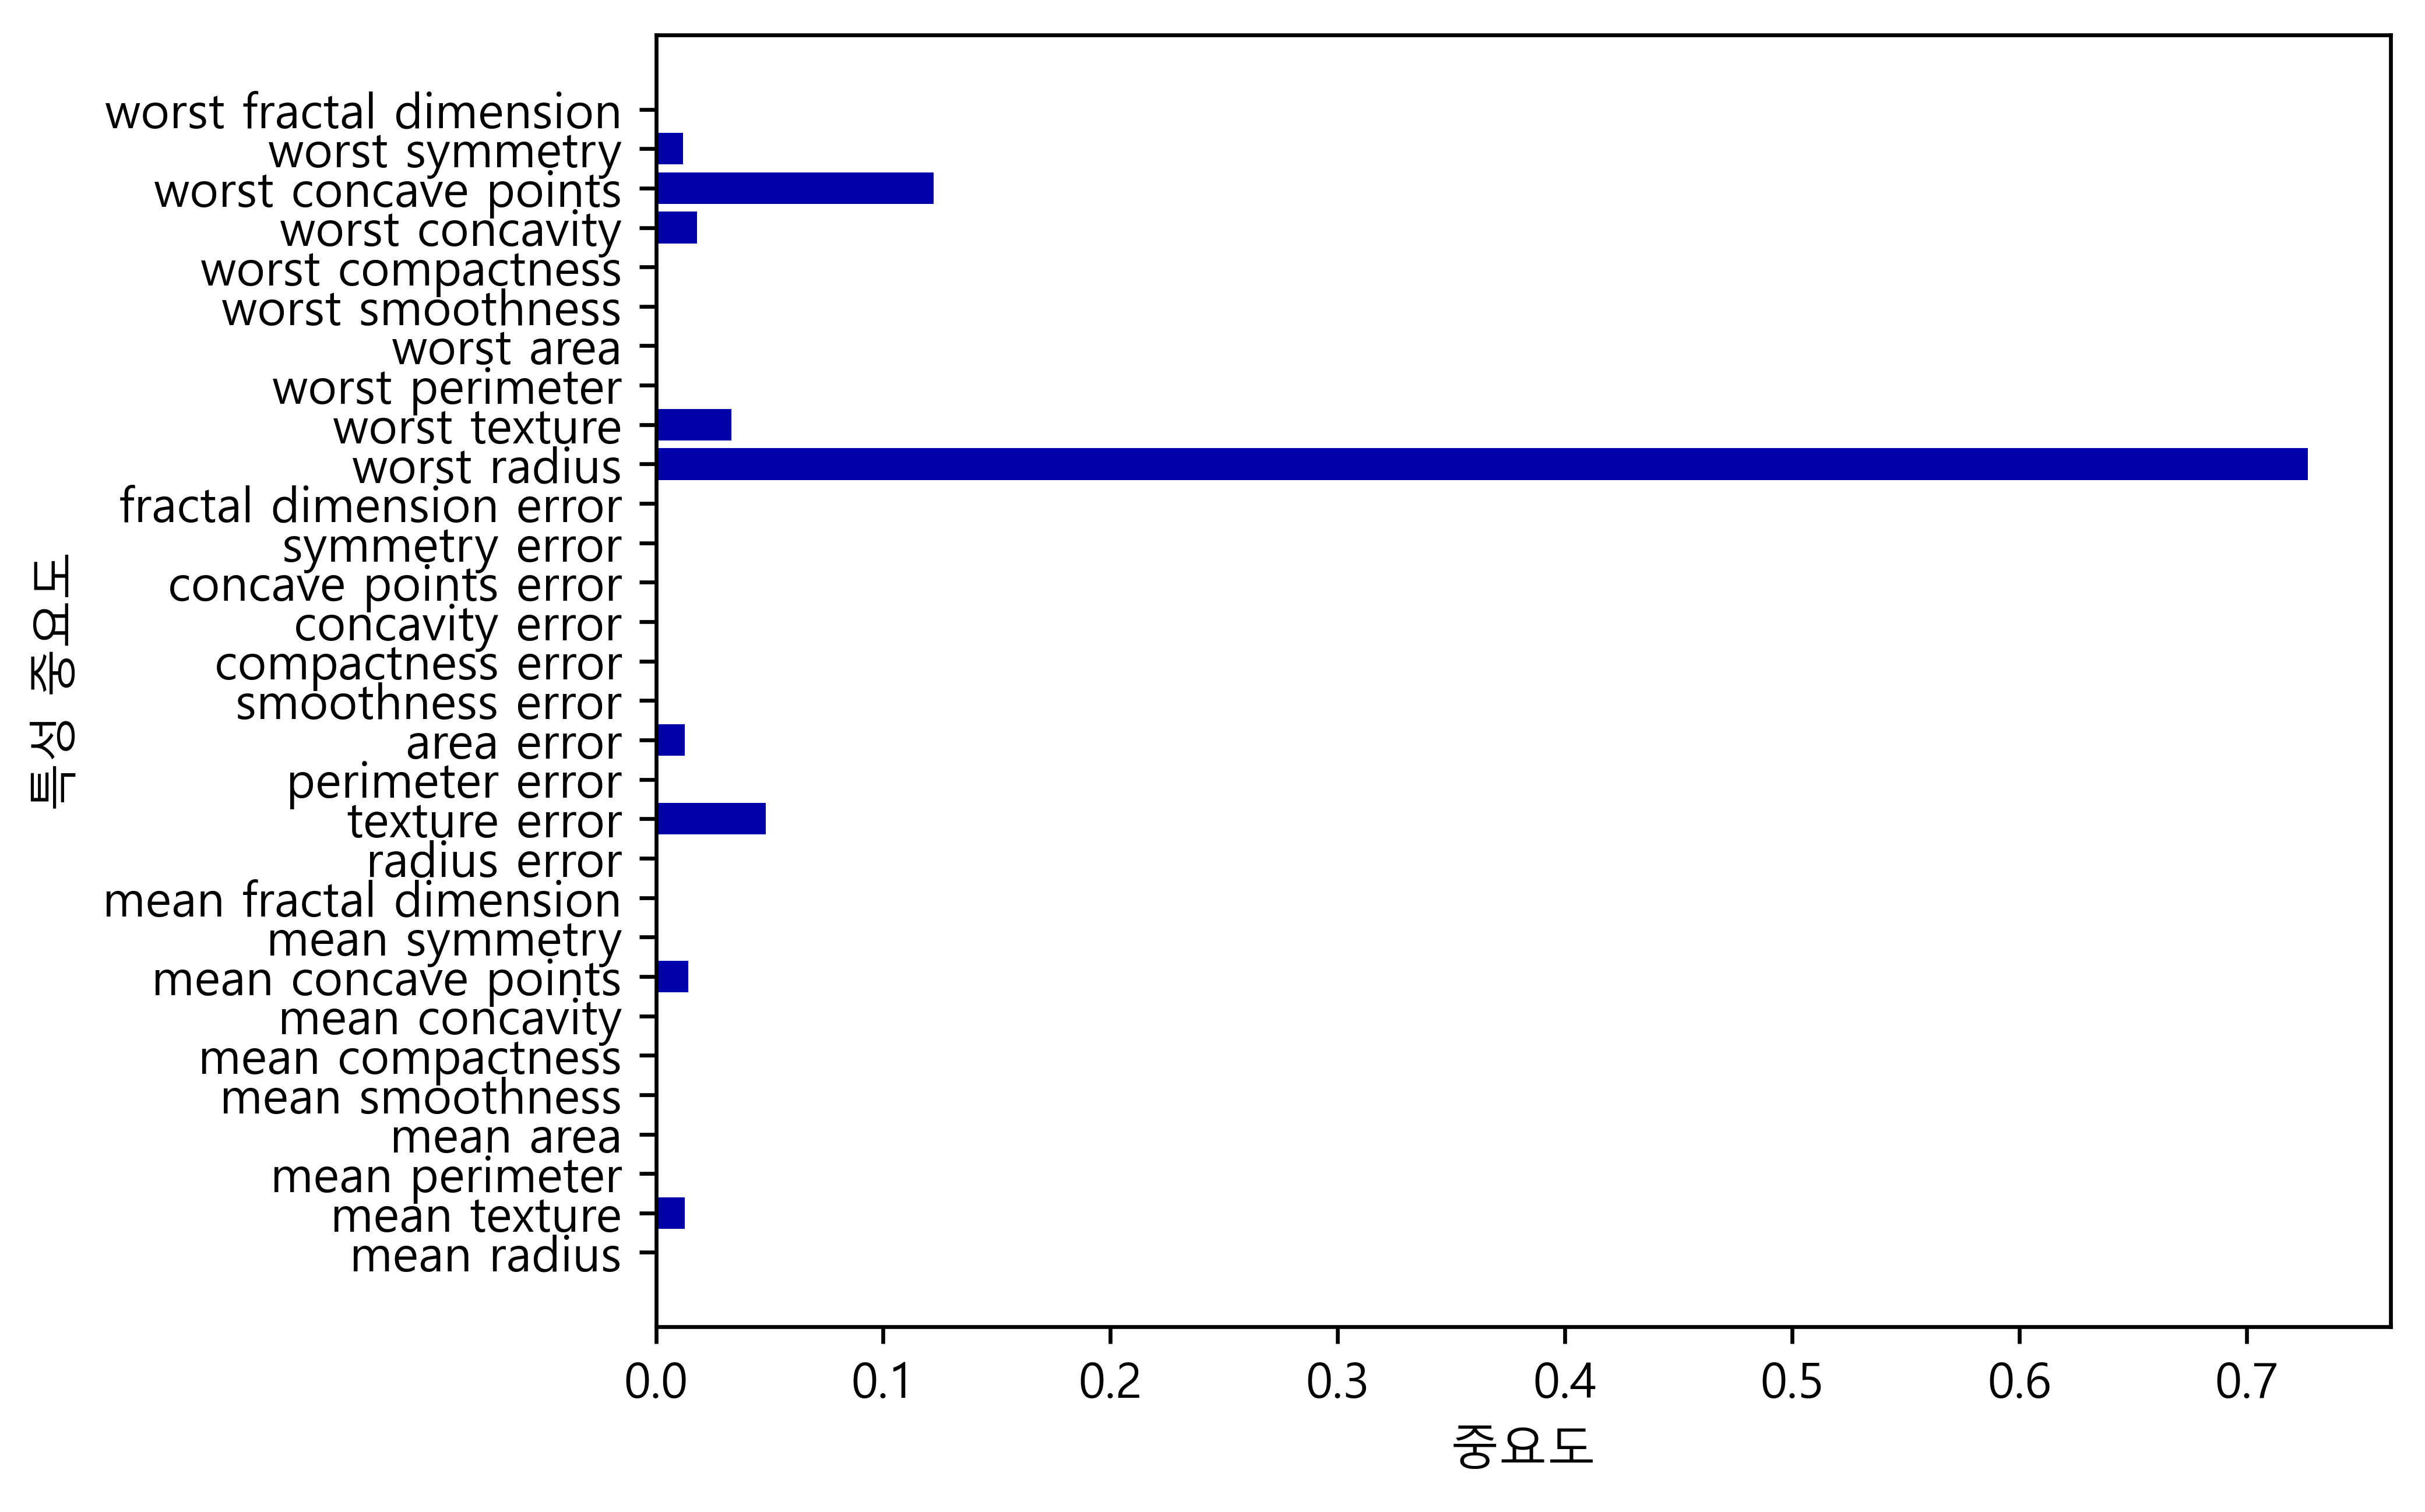

In [23]:
def plot_feature_importances(model):
      n_features = len(model.feature_importances_)
      plt.barh(np.arange(n_features), model.feature_importances_)
      plt.yticks(np.arange(n_features), cancer.feature_names)
      plt.ylabel("특성 중요도")
      plt.xlabel("중요도")
      plt.show()

plot_feature_importances(dt)

함수로 만들때, 1. 함수이름 정하기(메서드 이름) - 각 언어에 맞는 규격으로 만들기
              2. 매개변수 정하기(매개변수는 없는것이 제일 좋음)
              3. 반환값( 반환값은 있는것이 좋음)

### mglearn 라이브러리의 plots 모듈의 `plot_tree_not_monotone` 함수를 실행하세요.

## 결정 트리를 활용한 회귀

### DT-Q5 결정트리를 사용해서 `ram_price`을 분석하여, 가격을 예측하세요.
- [ ] DT-Q5(a). pandas를 사용해서 "ram_price.csv" 파일을 `ram_prices` 객체를 생성하세요.

- [ ] DT-Q5(b). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - y축의 지수에 `-`값을 표현할 수 없기 때문에 y축의 폰트를 `consolas`로 변경하세요.
    - x축과 y축에 label을 표시하세요("년" / "가격 ($/Mbyte)")
    - 일반적인 선 그래프를 사용하세요.   

- [ ] DT-Q5(c). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - 해당 그래프를 `log` 그래프로 변경하세요.

- [ ] DT-Q5(d). 학습데이터와 테스트 데이터를 분리하세요.
    - 학습 데이터는 1999년까지 데이터를 사용하세요.
    - 테스트 데이터는 1999년 이후 데이터를 사용하세요.

- [ ] DT-Q5(e). 학습데이터와 테스트 데이터를 분류하여 작성하세요.
    - y값은 log 함수를 적용하세요.

- [ ] DT-Q5(f). 결정트리의 회귀와 선형 회귀 예측기를 생성하고, 데이터에 학습을 진행하세요.
    - tree
    - linear_reg

- DT-Q5(g). 두 예측기에 테스트를 진행하세요.
    - 테스트에 사용되는 데이터는 모든 데이터를 활용하세요.

- DT-Q5(h). 예측된 값을 log로 변환하세요.

- DT-Q5(i). 기존 데이터와 예측 데이터 모두를 시각화하세요.